# Introductie

De World Happiness Score wordt elk jaar voor vele landen gemeten, deze wordt dan in een zogeheten World Happiness Report gepubliceerd. De World Happiness Score wordt aan de hand van verschillende criteria gemeten, zoals bijvoorbeeld gezondheid en welvaart, hiermee kan er een beeld geschetst worden over de wereld op het gebied van hoe blij mensen zijn met hoe het eraan toe is in het desbetreffende land. Zo hebben wij vijf World Happiness Reports verzameld over de periode van 2015 tot en met 2019, hiermee hebben we analyses gedaan waarbij we gekeken hebben van welke variabelen de World Happiness Score over het algemeen van afhangt. Hierbij is het natuurlijk ook belangrijk dat je vanuit verschillende perspectieven analyses maakt, aangezien het niet altijd zwart-wit is. Hierom hebben wij vanuit twee perspectieven analyses gemaakt. In het eerste perspectief hebben we onderzocht hoe de absolute waarde van een specifieke variabele de Happiness Score bij verschillende landen beïnvloedt, hierbij hebben we dus gekeken of er een bepaald verband is wanneer de variabele in waarde toeneemt, of dan de Happiness Score ook toeneemt. In het tweede perspectief hebben we de relatieve toename/afname van een variabele over de jaren heen onderzocht, en gekeken hoe de Happiness Score ieder jaar beïnvloedt werd door de variabele en of er een bepaald verband is. 


# Dataset en preprocessing

Wij hebben vijf datasets gebruikt, ieder dataset bevat informatie over de World Happiness binnen de periode 2015-2019. Al deze datasets kunnen gedownload worden op de volgende site: https://www.kaggle.com/datasets/unsdsn/world-happiness. Elke dataset bevat min of meer dezelfde variabelen: **Country**, **Region**, **Happiness Rank**, **Happiness Score**, **Standard Error**, **Economy (GDP per Capita)**, **Family**, **Health (Life Expectancy)**, **Freedom**, **Trust (Government Corruption)**, **Generosity** en **Dystopia Residual**. Deze vijf datasets wilden we samenvoegen in één dataset, die ook opgeschoond is, dat vereiste nogal wat preprocessing. Dit komt omdat de dataset van 2017 qua betekenis dezelfde variabelen had als de dataset van 2015, alleen de benaming was iets anders, ook had het een aantal extra variabelen die niet relevant waren voor onze analyses en ook niet in de dataset van 2015 voorkwamen, dit gold ook voor de dataset van 2016. We hadden de dataset van 2015 als referentie gebruikt, omdat dit de meest schone dataset was qua relevantie en benaming van de variabelen. De datasets van 2018 en 2019 vereisten ook wat preprocessing, omdat de variabelen hier ook een net andere benaming hadden, ook ontbrak hier de "Dystopia Residual" variabele. Nu wisten we welke variabelen we willen behouden, welke we niet wilden en hoe we de datasets moesten opschonen. Als eerst hebben we de variabelen die we niet wilden gebruiken uit de dataset gehaald, voor de dataset van 2015 waren dit de variabelen "Region" en "Standard Error", van 2016 de variabelen "Region","Lower Confidence Interval" en "Upper Confidence Interval" en van 2017 de variabelen "Whisker.high" en "Whisker.low". Voor de datasets van 2018 en 2019 hebben we geen variabelen weggehaald. Hierna hebben we de benaming van de variabelen aangepast, zodat het overeenkwam met de benaming zoals weergegeven in de dataset van 2015, zo hebben we bijvoorbeeld de variabele "Happiness.Rank" uit de dataset van 2017 veranderd naar "Happiness Rank". Ditzelfde hebben we gedaan voor de datasets van 2018 en 2019. We hadden hierna opgemerkt dat de volgorde van de variabelen in de datasets van 2015, 2016 en 2017 overeenkwamen, maar in die van 2018 en 2019 niet, dus we hadden de volgorde van de kolommen in de datasets van 2018 en 2019 aangepast zodat het overeenkwam met de overige datasets. Dit was nodig zodat de volgende stap makkelijker verloopt, het samenvoegen van de datasets. Nu we de datasets hebben samengevoegd, zagen we dat er in de kolom "Dystopia Residual" missing values voorkwamen, dit kwam omdat de datasets van 2018 en 2019 geen informatie hadden over deze kolom. We hebben dit probleem opgelost door de gemiddelde van de voorgaande jaren te nemen per land, en vervolgens de missing values van het desbetreffende land te vervangen met de gemiddelde over de jaren heen waar er wel informatie over was. Ten slotte hebben we nog een "Year" kolom toegevoegd aan onze samengevoegde dataset, deze variabele was nodig om bepaalde visualisaties te kunnen maken. Nu was onze dataset klaar en hebben we 11 variabelen die we kunnen gebruiken om visualisaties te maken: **Country**, **Happiness Rank**, **Happiness Score**, **Economy (GDP per Capita)**, **Family**, **Health (Life Expectancy)**, **Freedom**, **Trust (Government Corruption)**, **Generosity**, **Dystopia Residual** en **Year**.


### Invloed van gezondheid en economie op de Happiness Score

De economie kan een groot invloed hebben op de Happiness Score van landen. In de onderstaande grafiek kunnen we per land zien hoe de evolutie van de economie is, en hoe dit de Happiness Score van het land beïnvloedt. Er valt een interessant patroon op te merken, over het algemeen lijken de punten op de grafiek een opwaartse trent te hebben naarmate de economie van een land verbetert. Dit kan erop wijzen dat als de economie van een land verbetert, dat de Happiness Score van het land ook verbetert. 

In [30]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_data.csv').drop(columns=['Unnamed: 0'])

fig = px.scatter(
    df, x='Economy (GDP per Capita)', y='Happiness Score', color='Country'
    )

fig.update_layout(
    title="De invloed van de economie op de Happiness Score",
    xaxis_title="Economy (GDP per Capita)",
    yaxis_title="Happiness Score",
    annotations=[dict(
        x=0.5,
        y=-0.2,
        showarrow=False,
        text="Op de x-as is de Economy variabele weergegeven, een grotere waarde betekent dat de economie verbetert.\
        <br> Op de y-as is de Happiness Score weergegeven, dit geeft aan hoe blij mensen zijn. Uit de grafiek kan per land afgelezen worden hoezeer de Economy variabele de Happiness Score beïnvloedt.",
        xref="paper",
        yref="paper",
        font=dict(size=10)
        )
    ]
)

fig.show()

In [77]:
labels = ['Low', 'Below Average', 'Average', 'Above Average', 'High']
cut_quantized = pd.qcut(df['Happiness Score'], q=5, labels=labels)
health_quantized = pd.qcut(df['Health (Life Expectancy)'], q=5, labels=labels)
economy_quantized = pd.qcut(df['Economy (GDP per Capita)'], q=5, labels=labels)

parcats_data = [
    go.Parcats(
        dimensions=[
            {'label': 'Happiness Score', 'values': cut_quantized, 'categoryorder': 'array', 'categoryarray': labels},
            {'label': 'Health (Life Expectancy)', 'values': health_quantized, 'categoryorder': 'array', 'categoryarray': labels},
            {'label': 'Economy (GDP per Capita)', 'values': economy_quantized, 'categoryorder': 'array', 'categoryarray': labels}
        ],
        line={'color': cut_quantized.astype('category').cat.codes, 'colorscale': 'darkmint'},
    )
]

layout = go.Layout(
    title='Parallel Categories Plot of Happiness Score, Health (Life Expectancy), and Economy (GDP per Capita)',
    margin_b=90,
    annotations = [dict(xref='paper',
                        yref='paper',
                        x=0.5, y=-0.25,
                        showarrow=False,
                        text='Voor alle variabelen geldt dat ze gequantiseerd zijn in 5 categorieën. Hoe donkerder de kleur, hoe hoger de waarde. <br>Voor de variabele Health en Economy is af te lezen welk deel van de categorieën bestaat uit een bepaalde Happiness Score categorie.')])

fig_parcats = go.Figure(data=parcats_data, layout=layout)
fig_parcats.show()

Uit de plot hierboven blijkt dat Health en Economy beide nauwverwant zijn aan de Happiness Score. Voor alle categorieën van de Health en Economy variabele geldt dat het overgrote deel van een categorie een Happiness Score heeft in dezelfde categorie of dat deze maar één categorie afwijkt. Hieruit blijkt dus dat er een verband zit tussen Happiness Score en Health en tussen Happiness Score en Economy.

### Relatieve verandering gezondheid

De gezondheid kan ook een rol spelen bij de Happiness Score van een land. In de figuur hieronder zijn er twee heatmaps te zien, waarbij de eerste heatmap de verschillende metingen van de gezondheid per land en per jaar laat zien, hiermee kan de relatieve verandering van de gezondheid over de jaren heen afgelezen worden. De tweede heatmap laat de verschillende metingen van de Happiness Score per land en per jaar zien, waarmee eveneens de relatieve verandering over de jaren heen afgelezen kan worden. Als we bijvoorbeeld naar Afghanistan kijken, dan zien we dat in 2016 de gezondheidsscore afgenomen is, en ook de Happiness Score afgenomen is. Echter als we naar Azerbaijan kijken, dan zien we dat in 2016 de gezondheidsscore afgenomen is, maar de Happiness Score is toegenomen. Het hoeft dus niet zo te zijn dat als de gezondheidsscore toeneemt, dat dan de Happiness Score ook toeneemt, de Happiness Score kan afhangen van meerdere variabelen. 

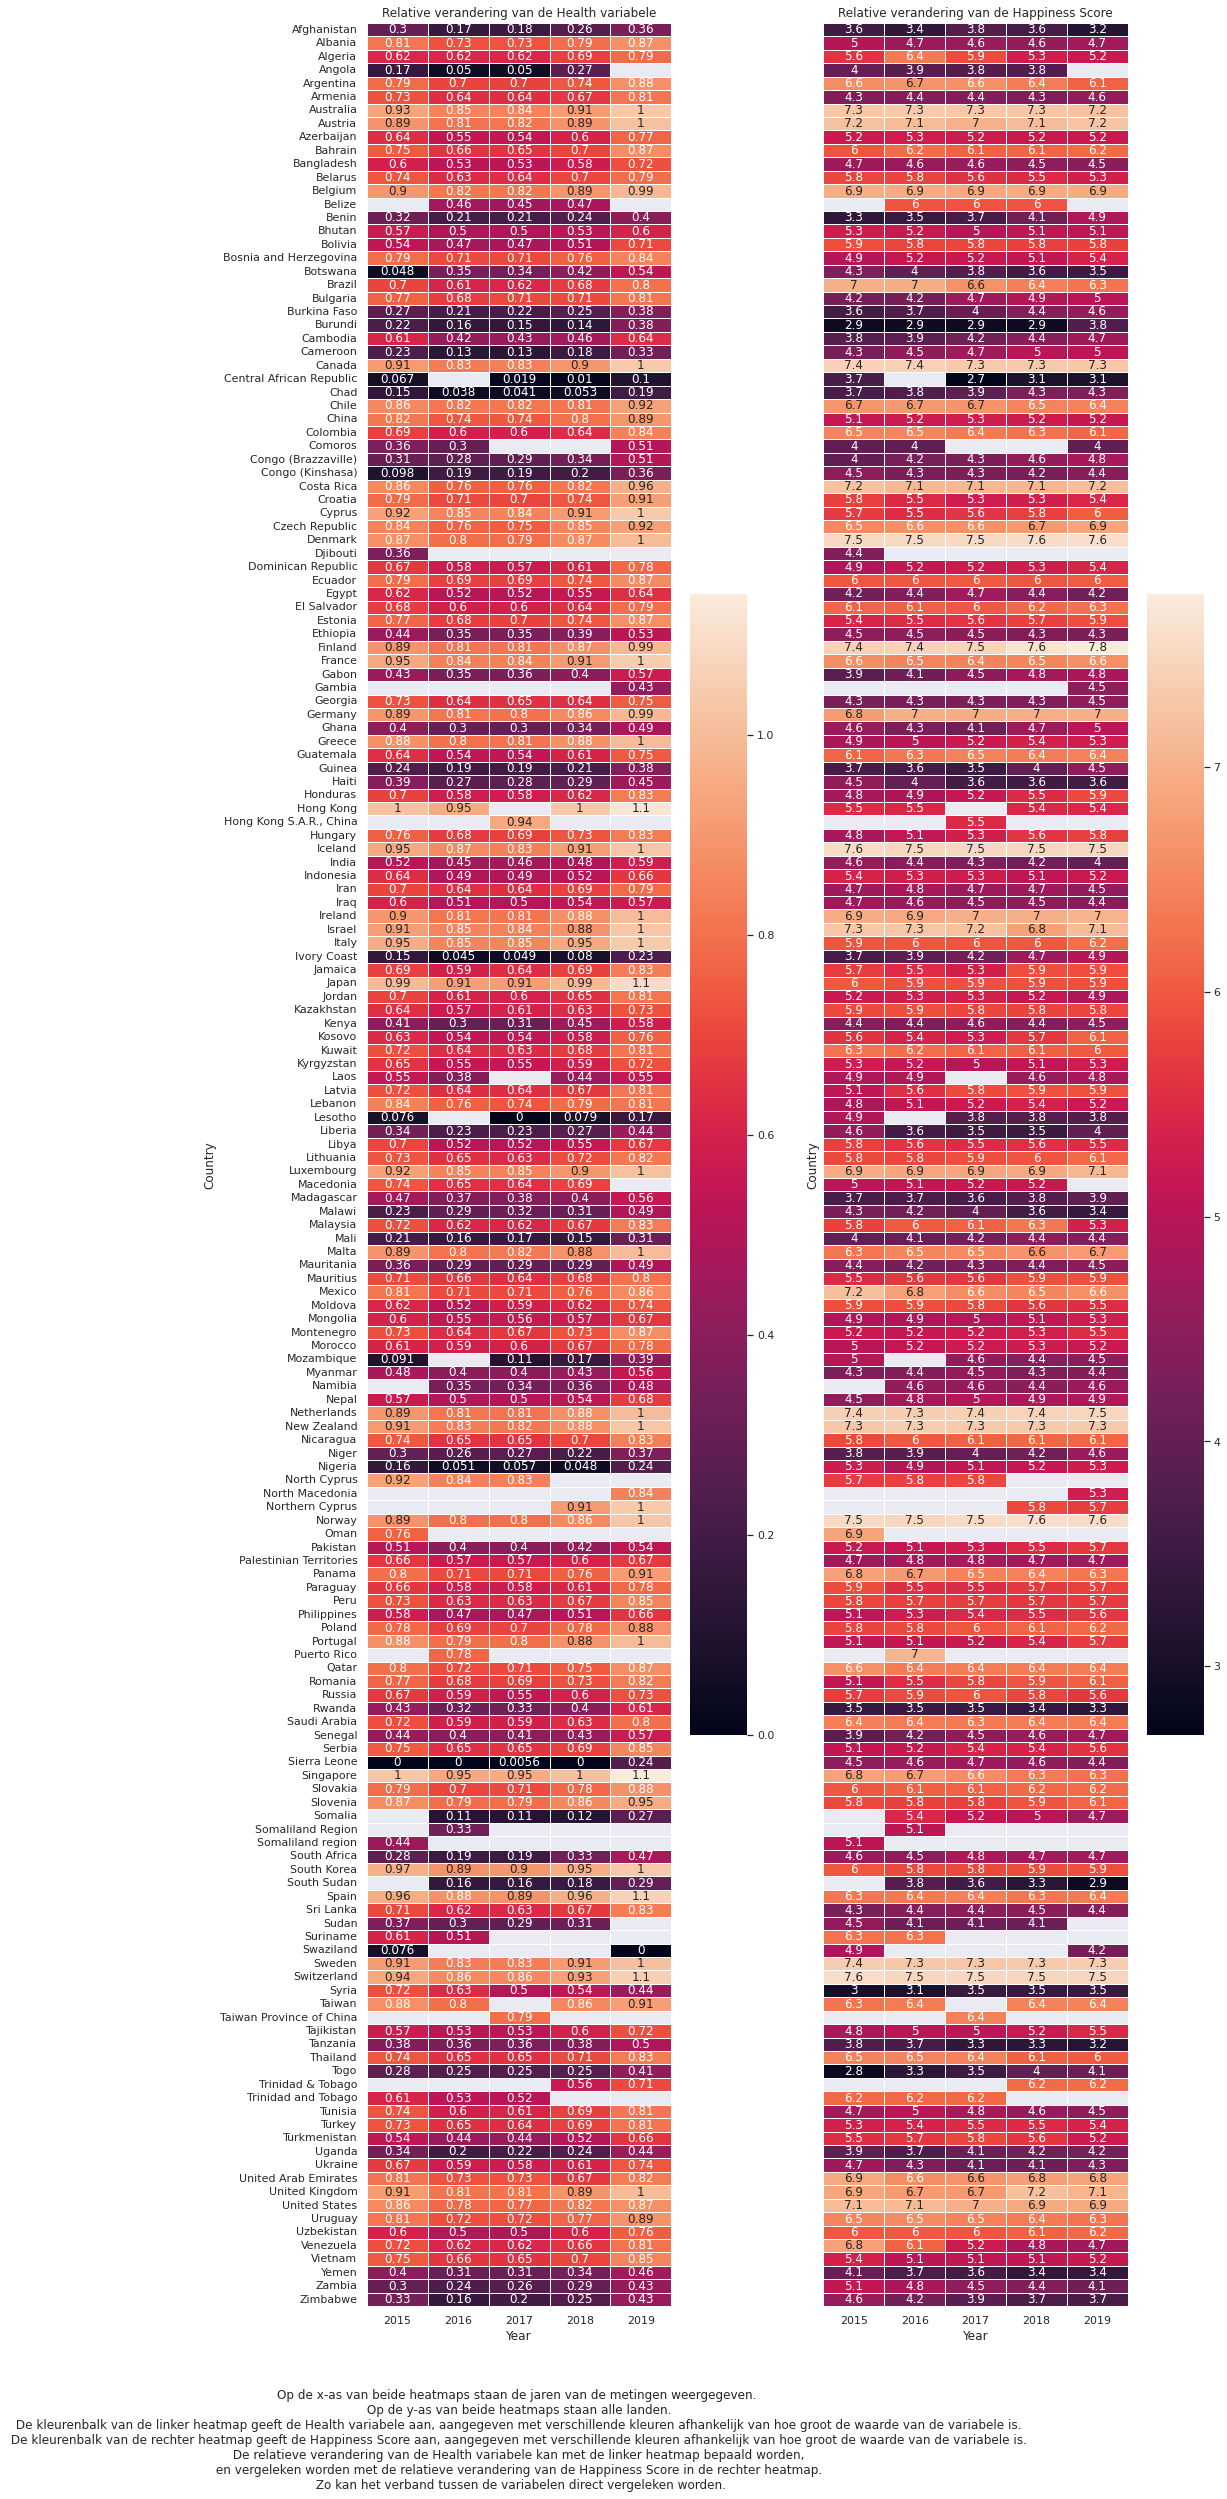

In [76]:
sns.set_theme()

rel1 = df.pivot(index='Country',columns='Year',values='Health (Life Expectancy)')
rel2 = df.pivot(index='Country',columns='Year',values='Happiness Score')

f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,42), sharey=True, sharex=True)

sns.heatmap(rel1, annot=True, linewidths=0.5, ax=ax1)
sns.heatmap(rel2, annot=True, linewidths=0.5, ax=ax2)

ax1.set_title('Relative verandering van de Health variabele')
ax2.set_title('Relative verandering van de Happiness Score')

caption='Op de x-as van beide heatmaps staan de jaren van de metingen weergegeven. \n Op de y-as van beide heatmaps staan alle landen. \n De kleurenbalk van de linker heatmap geeft de Health variabele aan, aangegeven met verschillende kleuren afhankelijk van hoe groot de waarde van de variabele is. \n De kleurenbalk van de rechter heatmap geeft de Happiness Score aan, aangegeven met verschillende kleuren afhankelijk van hoe groot de waarde van de variabele is. \n De relatieve verandering van de Health variabele kan met de linker heatmap bepaald worden, \n en vergeleken worden met de relatieve verandering van de Happiness Score in de rechter heatmap. \n Zo kan het verband tussen de variabelen direct vergeleken worden.'
f.text(0.5, -0.08, caption, ha='center', fontsize=12, transform=ax1.transAxes)

plt.show()

### Relatieve veranderingen van Afghanistan

In de onderstaande grafiek zijn per jaar alle waarden van Afghanistan laten zien. Als voorbeeld nemen we Family. Door steeds te kijken naar het relatieve verschil tussen twee achtereenvolgende jaren, is te zien dat Family in dezelfde jaren stijgt en daalt als de Happiness Score. Dit kan erop wijzen dat Family invloed heeft op de uiteindelijke Happiness Score.

In [79]:
year = df.head(n=5)["Year"]
generosity = df.head(n=5)["Generosity"]
economy  = df.head(n=5)["Economy (GDP per Capita)"]
family  = df.head(n=5)["Family"]/2
health  = df.head(n=5)["Health (Life Expectancy)"]
freedom  = df.head(n=5)["Freedom"]
trust  = df.head(n=5)["Trust (Government Corruption)"]
dystopia  = df.head(n=5)["Dystopia Residual"]/10
rank = df.head(n=5)["Happiness Rank"] 
score = df.head(n=5)["Happiness Score"]/10

categories = ["Happiness Score/10","Generosity", "Economy (GDP per Capita)", "Family","Health (Life Expectancy)","Freedom",
              "Trust (Government Corruption)","Dystopia Residual / 10"] 


fig = go.Figure()
count = 0

for i in year:
    fig.add_trace(go.Scatterpolar(
          r=[score[count],generosity[count], economy[count], family[count],health[count],freedom[count],trust[count],dystopia[count]],
          theta=categories,
          name=i
    ))
    count += 1

fig.update_layout(
    title = "Waarden van de variabelen van Afghanistan tijdens verschillende jaren",
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=[0, 0.45]
        )),
    showlegend=True,
    margin_b=90,
    annotations = [dict(xref='paper',
                        yref='paper',
                        x=0.5, 
                        y=-0.25,
                        showarrow=False,
                        text ='De as bij elke variabele laat de waarde zien per jaar. De waardes van sommige variabelen zijn gescaled voor betere visualisatie.')]
)

fig.show()

### Relatieve verandering Trust (Sketch)

In de onderstaande figuur zijn er twee pie plots. De eerste pie plot laat de wereldwijde score van de Trust variabele per jaar zien, hieruit kan afgelezen worden wat de relatieve verandering van de Trust variabele per jaar is. In de tweede pie plot wordt de wereldwijde Happiness Score per jaar laten zien, hieruit kan afgelezen worden wat de relatieve verandering van de Happiness Score per jaar is. Als de twee pie plots met elkaar vergeleken worden, dan valt er een interessant patroon te zien, als de score van de Trust variabele afneemt, dan neemt de Happiness Score ook af. Dus er is een verband tussen de Trust variabele en de Happiness Score.

In [78]:
fig2 = px.pie(
    df,
    names='Year',
    values='Trust (Government Corruption)'
)

fig2.update_layout(
    title="De wereldwijde score van de Trust variabele per jaar",
    annotations=[dict(
        x=0.5,
        y=-0.2,
        showarrow=False,
        text="In deze pie plot is er voor de jaren in de periode 2015-2019 de score van de Trust variabele van elk land bij elkaar opgeteld.<br> Hiermee kan er een wereldwijde beeld geschetst worden hoe betrouwbaar de regering is en hoe dit per jaar verandert.",
        xref="paper",
        yref="paper",
        font=dict(size=10)
        )
    ]
)



fig3 = px.pie(
    df,
    names='Year',
    values='Happiness Score'
)

fig3.update_layout(
    title="De wereldwijde score van de Happiness Score per jaar",
    annotations=[dict(
        x=0.5,
        y=-0.2,
        showarrow=False,
        text="In deze pie plot is er voor de jaren in de periode 2015-2019 de Happiness Score van elk land bij elkaar opgeteld.<br> Hiermee kan er een wereldwijde beeld geschetst worden hoe blij mensen zijn en hoe dit per jaar verandert. <br> Door de eerste pie plot met deze pie plot te vergelijken, kan er bekeken worden of er een verband is tussen de relatieve verandering van de Trust variabele met de relatieve verandering van de Happiness Score.",
        xref="paper",
        yref="paper",
        font=dict(size=10)
        )
    ]
)


fig2.show()
fig3.show()